# Week 4 - Individual Assignment

## The purpose of this notebook is to update my previous assignment with new focus areas of Districts 2 and 5. I'll make maps of asthma prevalence and distribution of parks in each SD. We'll contrast asthma prevalence and park access between the 2 districts.

As part of Chris' feedback. He's asking what we’re determining as a high-level park. I'll try to look at total acreage of each district

In [214]:
import pandas as pd
import geopandas as gpd

In [215]:
tracts = gpd.read_file('data/census_tracts.geojson')

In [216]:
sd = gpd.read_file('data/sd.geojson')

In [217]:
result = gpd.sjoin(tracts, sd, how= 'inner', op='within')

/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [218]:
result = gpd.sjoin(tracts, sd, how='inner', predicate='within')

In [219]:
print(result)

      OBJECTID_left    CT20 LABEL_left  ShapeSTArea_left  ShapeSTLength_left  \
0                 1  101110    1011.10      1.229562e+07        15083.854287   
1                 2  101122    1011.22      2.845774e+07        31671.455844   
2                 3  101220    1012.20      7.522093e+06        12698.783810   
3                 4  101221    1012.21      3.812000e+06         9161.710543   
4                 5  101222    1012.22      3.191371e+06         9980.600461   
...             ...     ...        ...               ...                 ...   
2469           2470  980011    9800.11      1.481044e+07        17595.688847   
2470           2471  980012    9800.12      9.826692e+06        15784.608923   
2473           2474  980015    9800.15      5.823595e+07        35820.150627   
2476           2477  980018    9800.18      7.978138e+07        55508.072056   
2489           2490  980034    9800.34      6.954546e+07        61180.649729   

                                       

In [220]:
tracts = gpd.read_file('data/census_tracts.geojson')

In [221]:
sd5 = gpd.read_file('data/district5.csv')

In [222]:
sd2 = gpd.read_file('data/district2.csv')

In [223]:
new_gdf = gpd.GeoDataFrame(sd5)

In [224]:
new_gdf_2 = gpd.GeoDataFrame(sd2)

In [225]:
print(new_gdf)

    OBJECTID_12 Join_Count TARGET_FID    CT20    LABEL               NAME  \
0             1          1          1  101110   1011.1  5TH SUP. DISTRICT   
1             2          1          2  101122  1011.22  5TH SUP. DISTRICT   
2             3          1          3  101220   1012.2  5TH SUP. DISTRICT   
3             4          1          4  101221  1012.21  5TH SUP. DISTRICT   
4             5          1          5  101222  1012.22  5TH SUP. DISTRICT   
..          ...        ...        ...     ...      ...                ...   
443        2468          2       2468  980009  9800.09  5TH SUP. DISTRICT   
444        2479          1       2479  980020   9800.2  5TH SUP. DISTRICT   
445        2480          2       2480  980021  9800.21  5TH SUP. DISTRICT   
446        2485          1       2485  980026  9800.26  5TH SUP. DISTRICT   
447        2495          1       2495  980039  9800.39  5TH SUP. DISTRICT   

                         SUP_NAME DIST_SUP CITYNAME_ALF          NAME_1  \


In [226]:
print(new_gdf_2)

    OBJECTID_12 Join_Count TARGET_FID    CT20    LABEL               NAME  \
0           640          2        640  211000     2110  2ND SUP. DISTRICT   
1           641          2        641  211121  2111.21  2ND SUP. DISTRICT   
2           642          3        642  211122  2111.22  2ND SUP. DISTRICT   
3           643          2        643  211123  2111.23  2ND SUP. DISTRICT   
4           644          2        644  211124  2111.24  2ND SUP. DISTRICT   
..          ...        ...        ...     ...      ...                ...   
501        2484          1       2484  980025  9800.25  2ND SUP. DISTRICT   
502        2486          1       2486  980028  9800.28  2ND SUP. DISTRICT   
503        2487          1       2487  980030   9800.3  2ND SUP. DISTRICT   
504        2493          2       2493  980037  9800.37  2ND SUP. DISTRICT   
505        2494          1       2494  980038  9800.38  2ND SUP. DISTRICT   

                         SUP_NAME DIST_SUP CITYNAME_ALF  \
0    2ND DISTRIC

In [227]:
tracts_sd5 = gpd.clip(tracts, sd5)

/tmp/ipykernel_703/2395503371.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  tracts_sd5 = gpd.clip(tracts, sd5)
/opt/conda/lib/python3.11/site-packages/geopandas/array.py:1019: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/opt/conda/lib/python3.11/site-packages/geopandas/array.py:1020: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/opt/conda/lib/python3.11/site-packages/geopandas/array.py:1021: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/opt/conda/lib/python3.11/site-packages/geopandas/array.py:1022: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy


In [228]:
print(tracts.crs)
print(sd5.crs)

EPSG:4326
None


In [229]:
sd5.crs = 'EPSG:4326'

In [230]:
sd5 = sd5.to_crs(tracts.crs)

In [231]:
tracts_sd5 = gpd.clip(tracts, sd5)

/opt/conda/lib/python3.11/site-packages/geopandas/array.py:1019: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/opt/conda/lib/python3.11/site-packages/geopandas/array.py:1020: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/opt/conda/lib/python3.11/site-packages/geopandas/array.py:1021: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/opt/conda/lib/python3.11/site-packages/geopandas/array.py:1022: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy


i dont have geometry in sd5 bc it's a csv. lets see if this code can alleviate the issue

In [232]:
print(sd5.columns)

Index(['OBJECTID_12', 'Join_Count', 'TARGET_FID', 'CT20', 'LABEL', 'NAME',
       'SUP_NAME', 'DIST_SUP', 'CITYNAME_ALF', 'NAME_1', 'JURISDICTION',
       'AREA_NUM', 'AREA_NAME', 'Shape__Area', 'Shape__Length', 'geometry'],
      dtype='object')


In [233]:
geometry = [Point(xy) for xy in zip(sd5['longitude'], sd5['latitude'])]
sd5 = gpd.GeoDataFrame(sd5, geometry=geometry)

KeyError: 'longitude'

In [234]:
print(tracts.columns)

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength',
       'geometry'],
      dtype='object')


another approach.. will shift gears to how i approached assignment 3

In [235]:
csv_file_path = 'data/asthma.csv'
asthma = pd.read_csv('data/asthma.csv')

In [236]:
asthma.shape

(2343, 8)

In [237]:
asthma.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,Asthma
0,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,76.10
1,6037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,86.77
2,6037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,114.33
3,6037203300,2000,Los Angeles,90033,Los Angeles,-118.207788,34.058872,65.53
4,6037291220,3640,Los Angeles,90247,Los Angeles,-118.286709,33.877139,64.77


In [238]:
asthma = pd.read_csv('data/asthma.csv', dtype= {'Census Tract':str,})

In [239]:
asthma['Census Tract'] = asthma['Census Tract'].str.zfill(11)

In [240]:
asthma.head(5)

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,Asthma
0,06037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,76.10
1,06037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,86.77
2,06037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,114.33
3,06037203300,2000,Los Angeles,90033,Los Angeles,-118.207788,34.058872,65.53
4,06037291220,3640,Los Angeles,90247,Los Angeles,-118.286709,33.877139,64.77


In [241]:
asthma.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Census Tract          2343 non-null   object 
 1   Total Population      2343 non-null   int64  
 2   California County     2343 non-null   object 
 3   ZIP                   2343 non-null   int64  
 4   Approximate Location  2343 non-null   object 
 5   Longitude             2343 non-null   float64
 6   Latitude              2343 non-null   float64
 7   Asthma                2334 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 146.6+ KB


In [242]:
asthma = asthma.rename(columns = {'Census Tract':'FIPS'})

In [243]:
asthma.head(10)

,FIPS,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,Asthma
0,06037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,76.10
1,06037542402,3306,Los Angeles,90221,Compton,-118.212413,33.881969,86.77
2,06037543202,5124,Los Angeles,90220,Compton,-118.230032,33.879862,114.33
3,06037203300,2000,Los Angeles,90033,Los Angeles,-118.207788,34.058872,65.53
4,06037291220,3640,Los Angeles,90247,Los Angeles,-118.286709,33.877139,64.77
5,06037433501,1949,Los Angeles,91733,South El Monte,-118.065122,34.057255,65.92
6,06037243100,6772,Los Angeles,90059,Los Angeles,-118.235093,33.932796,129.20
7,06037227010,5705,Los Angeles,90011,Los Angeles,-118.246997,34.018526,68.48
8,06037226001,2615,Los Angeles,90021,Los Angeles,-118.250274,34.024484,72.02
9,06037433101,2464,Los Angeles,91731,El Monte,-118.060557,34.068691,60.57


In [244]:
district5 = pd.read_csv('data/district5.csv',
    dtype =
    {
        'CT20':str,
    }
)
district5

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length
0,1,1,1,101110,1011.10,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.676519e+06,5565.411341
1,2,1,2,101122,1011.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,3.881001e+06,11695.304280
2,3,1,3,101220,1012.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.025452e+06,4688.607147
3,4,1,4,101221,1012.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,5.197057e+05,3378.824327
4,5,1,5,101222,1012.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,4.350619e+05,3685.233312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2468,2,2468,980009,9800.09,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,Metro Planning Area,3.111583e+07,29917.249730
444,2479,1,2479,980020,9800.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.251160e+07,22316.623370
445,2480,2,2480,980021,9800.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.019501e+07,18963.319730
446,2485,1,2485,980026,9800.26,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,1,San Fernando Valley Planning Area,2.040772e+07,37925.072330


In [245]:
district5.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID_12    448 non-null    int64  
 1   Join_Count     448 non-null    int64  
 2   TARGET_FID     448 non-null    int64  
 3   CT20           448 non-null    object 
 4   LABEL          448 non-null    float64
 5   NAME           448 non-null    object 
 6   SUP_NAME       448 non-null    object 
 7   DIST_SUP       448 non-null    int64  
 8   CITYNAME_ALF   384 non-null    object 
 9   NAME_1         72 non-null     object 
 10  JURISDICTION   448 non-null    object 
 11  AREA_NUM       448 non-null    int64  
 12  AREA_NAME      448 non-null    object 
 13  Shape__Area    448 non-null    float64
 14  Shape__Length  448 non-null    float64
dtypes: float64(3), int64(5), object(7)
memory usage: 52.6+ KB


In [246]:
district5['FIPS'] = '06' + '037' + district5['CT20']
district5.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,FIPS
0,1,1,1,101110,1011.10,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.676519e+06,5565.411341,06037101110
1,2,1,2,101122,1011.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,3.881001e+06,11695.304280,06037101122
2,3,1,3,101220,1012.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.025452e+06,4688.607147,06037101220
3,4,1,4,101221,1012.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,5.197057e+05,3378.824327,06037101221
4,5,1,5,101222,1012.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,4.350619e+05,3685.233312,06037101222


In [247]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [248]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [249]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


In [61]:
tracts_asthma= tracts.merge(asthma, on = "FIPS")

In [250]:
tracts_asthma.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,Asthma
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,4283,Los Angeles,91042,Los Angeles,-118.292987,34.259474,30.87
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,3405,Los Angeles,91042,Los Angeles,-118.290147,34.267721,26.78
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,3702,Los Angeles,91042,Los Angeles,-118.281632,34.251609,30.87
3,6,101300,1013.00,2.777377e+07,29384.860602,"POLYGON ((-118.26530 34.25735, -118.26530 34.2...",06037101300,3884,Los Angeles,91042,Los Angeles,-118.270999,34.248778,22.91
4,7,101400,1014.00,6.791532e+07,42668.928986,"POLYGON ((-118.29657 34.25356, -118.29694 34.2...",06037101400,3458,Los Angeles,91042,Los Angeles,-118.294163,34.242853,24.28


<Axes: >

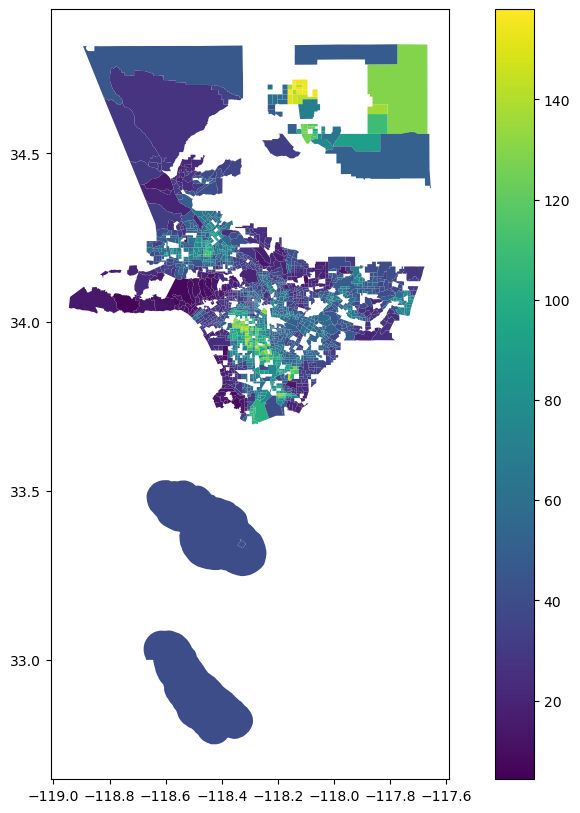

In [251]:
tracts_asthma.plot(figsize=(12,10),
                 column='Asthma',
                 legend=True, 
                 )

In [65]:
district5asthma=tracts_asthma.merge(district5,on="FIPS")

<Axes: >

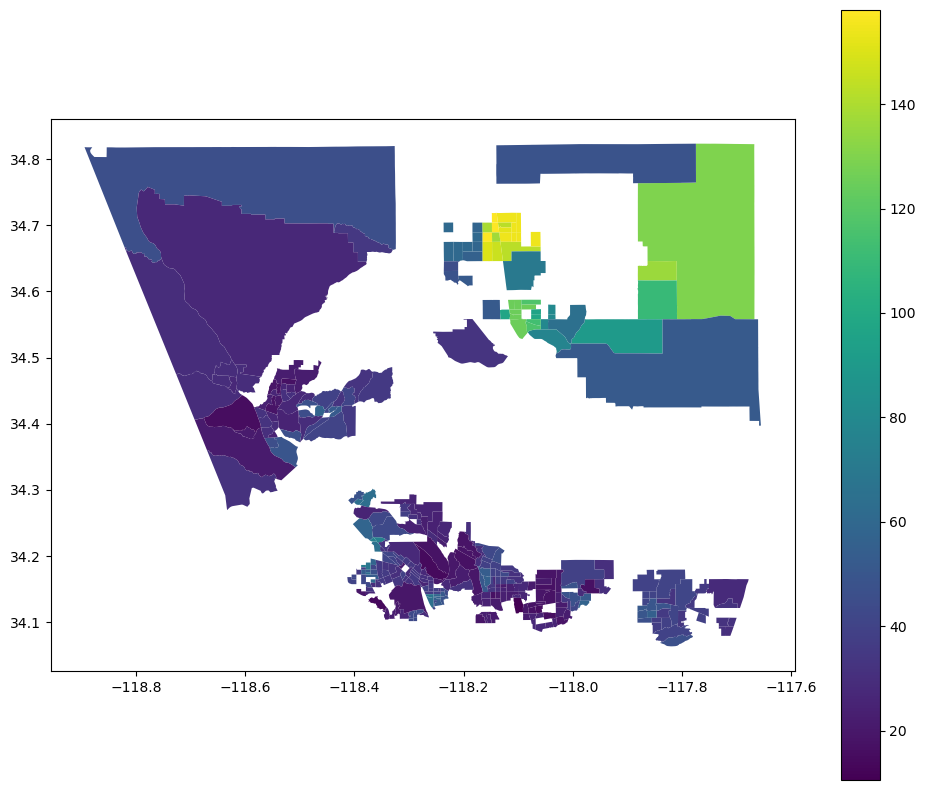

In [252]:
district5asthma.plot(figsize=(12,10),
                 column='Asthma',
                 legend=True, )

In [253]:
district2 = pd.read_csv('data/district2.csv',
    dtype =
    {
        'CT20':str,
    }
)
district5

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,FIPS
0,1,1,1,101110,1011.10,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.676519e+06,5565.411341,06037101110
1,2,1,2,101122,1011.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,3.881001e+06,11695.304280,06037101122
2,3,1,3,101220,1012.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.025452e+06,4688.607147,06037101220
3,4,1,4,101221,1012.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,5.197057e+05,3378.824327,06037101221
4,5,1,5,101222,1012.22,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,4.350619e+05,3685.233312,06037101222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2468,2,2468,980009,9800.09,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,Metro Planning Area,3.111583e+07,29917.249730,06037980009
444,2479,1,2479,980020,9800.20,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.251160e+07,22316.623370,06037980020
445,2480,2,2480,980021,9800.21,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,3,San Fernando Valley Planning Area,1.019501e+07,18963.319730,06037980021
446,2485,1,2485,980026,9800.26,5TH SUP. DISTRICT,5TH DISTRICT: KATHRYN BARGER,5,LOS ANGELES,NaN,INCORPORATED CITY,1,San Fernando Valley Planning Area,2.040772e+07,37925.072330,06037980026


In [254]:
district2['FIPS'] = '06' + '037' + district2['CT20']
district2.head()

,OBJECTID_12,Join_Count,TARGET_FID,CT20,LABEL,NAME,SUP_NAME,DIST_SUP,CITYNAME_ALF,NAME_1,JURISDICTION,AREA_NUM,AREA_NAME,Shape__Area,Shape__Length,FIPS
0,640,2,640,211000,2110.00,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,5,Westside Planning Area,3.881413e+06,9270.888577,06037211000
1,641,2,641,211121,2111.21,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,3.125745e+05,2799.117227,06037211121
2,642,3,642,211122,2111.22,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,5.341218e+05,3050.487937,06037211122
3,643,2,643,211123,2111.23,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,2.513022e+05,2501.035059,06037211123
4,644,2,644,211124,2111.24,2ND SUP. DISTRICT,2ND DISTRICT: HOLLY MITCHELL,2,LOS ANGELES,NaN,INCORPORATED CITY,9,Metro Planning Area,5.771177e+05,3012.923477,06037211124


In [255]:
district2asthma=tracts_asthma.merge(district2,on="FIPS")

<Axes: >

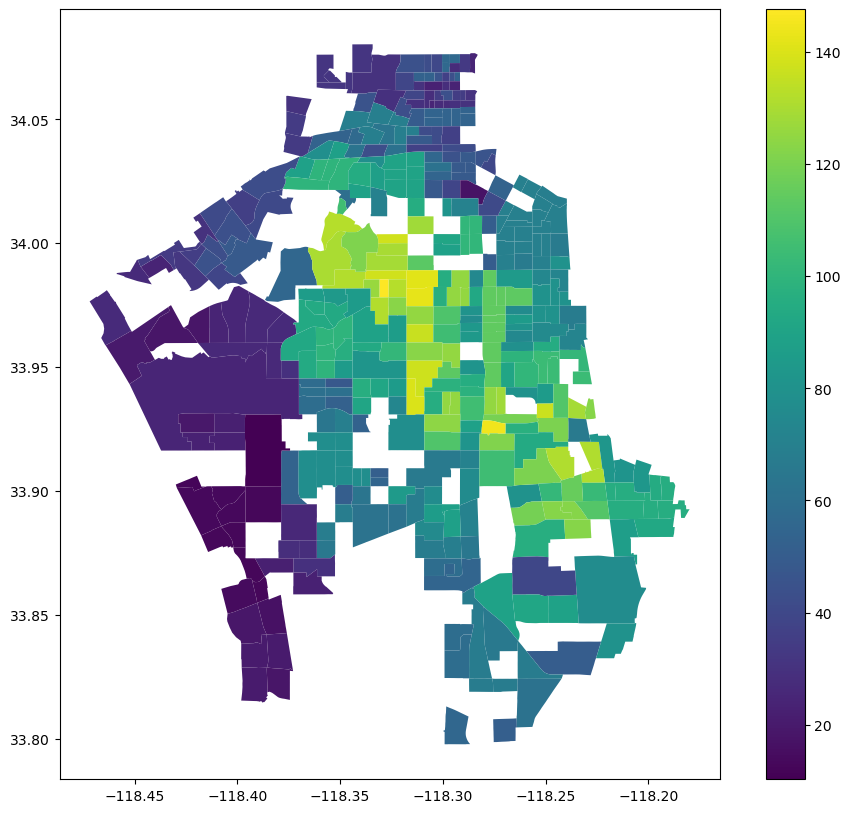

In [256]:
district2asthma.plot(figsize=(12,10),
                 column='Asthma',
                 legend=True, )

In [257]:
parks = gpd.read_file('data/parks.geojson')

In [260]:
parks.head()

,OBJECTID,UNIT_ID,LMS_ID,PARK_NAME,PARK_LBL,ACCESS_TYP,RPT_ACRES,GIS_ACRES,AGNCY_NAME,AGNCY_LEV,...,CENTER_LON,ADDRESS,CITY,ZIP,HOURS,PHONES,IS_COUNTY,Shape__Area,Shape__Length,geometry
0,1,30.0,23603.0,El Barrio Park,El Barrio Park,Open Access,2.093,2.092992,"Claremont, City of",City,...,-117.704423,400 Claremont Blvd,Claremont,91711,None,None,No,9.117036e+04,1451.547906,"POLYGON ((-117.70383 34.09747, -117.70421 34.0..."
1,2,56.0,NaN,El Dorado Park,El Dorado Park,Open Access,5.144,5.143217,"Lancaster, City of",City,...,-118.122109,44501 5th St E,Lancaster,93535,None,None,No,2.240376e+05,2192.277128,"POLYGON ((-118.12252 34.69275, -118.12252 34.6..."
2,3,62.0,3000015.0,Atlantic Avenue Park,Atlantic Avenue Park,Open Access,1.960,1.959610,"Los Angeles, County of",County,...,-118.155201,570 S. Atlantic Blvd.,Los Angeles,90022,March 1st to October 31st<br>\nOperating Hours...,General/Aquatics: (323) 260-2341; Reservations...,Yes,8.536029e+04,1139.269960,"POLYGON ((-118.15541 34.02582, -118.15540 34.0..."
3,4,72.0,22715.0,El Escorpion Park,El Escorpion Park,Open Access,66.914,66.338029,"Los Angeles, City of",City,...,-118.664169,6801 Sunset Ridge Ct,West Hills,91307,None,(818) 883-6641,No,2.889673e+06,7761.831975,"POLYGON ((-118.66713 34.19881, -118.66714 34.1..."
4,5,78.0,22860.0,El Marino Park/ El Marino Elementary,El Marino Park Elementary/El Marino Park,Open Access,3.200,1.650439,"Culver City, City of",City,...,-118.399233,11450 Port Rd,Culver City,90230,None,None,No,7.189283e+04,1215.415276,"POLYGON ((-118.39909 33.99221, -118.39910 33.9..."


In [261]:
sd['FIPS'] ='06' + '037' + tracts['CT20']

In [262]:
parks.head()

,OBJECTID,UNIT_ID,LMS_ID,PARK_NAME,PARK_LBL,ACCESS_TYP,RPT_ACRES,GIS_ACRES,AGNCY_NAME,AGNCY_LEV,...,CENTER_LON,ADDRESS,CITY,ZIP,HOURS,PHONES,IS_COUNTY,Shape__Area,Shape__Length,geometry
0,1,30.0,23603.0,El Barrio Park,El Barrio Park,Open Access,2.093,2.092992,"Claremont, City of",City,...,-117.704423,400 Claremont Blvd,Claremont,91711,None,None,No,9.117036e+04,1451.547906,"POLYGON ((-117.70383 34.09747, -117.70421 34.0..."
1,2,56.0,NaN,El Dorado Park,El Dorado Park,Open Access,5.144,5.143217,"Lancaster, City of",City,...,-118.122109,44501 5th St E,Lancaster,93535,None,None,No,2.240376e+05,2192.277128,"POLYGON ((-118.12252 34.69275, -118.12252 34.6..."
2,3,62.0,3000015.0,Atlantic Avenue Park,Atlantic Avenue Park,Open Access,1.960,1.959610,"Los Angeles, County of",County,...,-118.155201,570 S. Atlantic Blvd.,Los Angeles,90022,March 1st to October 31st<br>\nOperating Hours...,General/Aquatics: (323) 260-2341; Reservations...,Yes,8.536029e+04,1139.269960,"POLYGON ((-118.15541 34.02582, -118.15540 34.0..."
3,4,72.0,22715.0,El Escorpion Park,El Escorpion Park,Open Access,66.914,66.338029,"Los Angeles, City of",City,...,-118.664169,6801 Sunset Ridge Ct,West Hills,91307,None,(818) 883-6641,No,2.889673e+06,7761.831975,"POLYGON ((-118.66713 34.19881, -118.66714 34.1..."
4,5,78.0,22860.0,El Marino Park/ El Marino Elementary,El Marino Park Elementary/El Marino Park,Open Access,3.200,1.650439,"Culver City, City of",City,...,-118.399233,11450 Port Rd,Culver City,90230,None,None,No,7.189283e+04,1215.415276,"POLYGON ((-118.39909 33.99221, -118.39910 33.9..."


In [263]:
parks.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3012 entries, 0 to 3011
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       3012 non-null   int64   
 1   UNIT_ID        3011 non-null   float64 
 2   LMS_ID         1263 non-null   float64 
 3   PARK_NAME      3012 non-null   object  
 4   PARK_LBL       3012 non-null   object  
 5   ACCESS_TYP     3012 non-null   object  
 6   RPT_ACRES      3012 non-null   float64 
 7   GIS_ACRES      3012 non-null   float64 
 8   AGNCY_NAME     3012 non-null   object  
 9   AGNCY_LEV      3012 non-null   object  
 10  AGNCY_TYP      3012 non-null   object  
 11  AGNCY_WEB      3010 non-null   object  
 12  MNG_AGENCY     3012 non-null   object  
 13  COGP_TYP       3011 non-null   object  
 14  NDS_AN_TYP     3009 non-null   object  
 15  NEEDS_ANLZ     3010 non-null   object  
 16  TKIT_SUM       3010 non-null   object  
 17  AMEN_RPT       3010 non-n

In [264]:
tracts_parks= tracts.merge(parks, on = "geometry")

<Axes: >

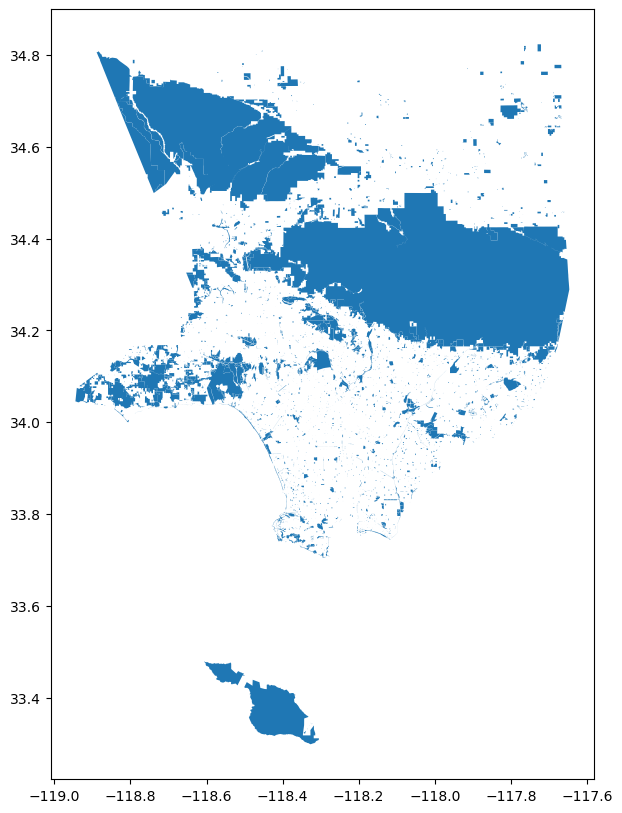

In [265]:
parks.plot(figsize=(12,10))

In [266]:
district5.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID_12    448 non-null    int64  
 1   Join_Count     448 non-null    int64  
 2   TARGET_FID     448 non-null    int64  
 3   CT20           448 non-null    object 
 4   LABEL          448 non-null    float64
 5   NAME           448 non-null    object 
 6   SUP_NAME       448 non-null    object 
 7   DIST_SUP       448 non-null    int64  
 8   CITYNAME_ALF   384 non-null    object 
 9   NAME_1         72 non-null     object 
 10  JURISDICTION   448 non-null    object 
 11  AREA_NUM       448 non-null    int64  
 12  AREA_NAME      448 non-null    object 
 13  Shape__Area    448 non-null    float64
 14  Shape__Length  448 non-null    float64
 15  FIPS           448 non-null    object 
dtypes: float64(3), int64(5), object(8)
memory usage: 56.1+ KB


In [267]:
parks_in_sd5 = gpd.sjoin(tracts_parks, sd5, how='inner', op='within')

/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [268]:
parks_in_sd5 = gpd.sjoin(tracts_parks, sd5, how='inner', predicate='within')

In [269]:
print(parks_in_sd5)

Empty GeoDataFrame
Columns: [OBJECTID_x, CT20_left, LABEL_left, ShapeSTArea, ShapeSTLength, geometry, FIPS, OBJECTID_y, UNIT_ID, LMS_ID, PARK_NAME, PARK_LBL, ACCESS_TYP, RPT_ACRES, GIS_ACRES, AGNCY_NAME, AGNCY_LEV, AGNCY_TYP, AGNCY_WEB, MNG_AGENCY, COGP_TYP, NDS_AN_TYP, NEEDS_ANLZ, TKIT_SUM, AMEN_RPT, PRKINF_CND, AM_OPNSP, AM_TRLS, TRLS_MI, TENIS, BSKTB, BASEB, SOCCR, MPFLD, FITZN, SK8PK, PCNIC, PLGND, POOLS, SPPAD, DGPRK, GYM, COMCT, SNRCT, RSTRM, TOTAL_GOOD, TOTAL_FAIR, TOTAL_POOR, TYPE, CENTER_LAT, CENTER_LON, ADDRESS, CITY, ZIP, HOURS, PHONES, IS_COUNTY, Shape__Area_left, Shape__Length_left, index_right, OBJECTID_12, Join_Count, TARGET_FID, CT20_right, LABEL_right, NAME, SUP_NAME, DIST_SUP, CITYNAME_ALF, NAME_1, JURISDICTION, AREA_NUM, AREA_NAME, Shape__Area_right, Shape__Length_right]
Index: []

[0 rows x 75 columns]


In [270]:
from shapely.geometry import Polygon
geopandas = gpd
parks_locations = geopandas.overlay(district5asthma, parks, how='intersection', keep_geom_type=None, make_valid=True)

/tmp/ipykernel_703/1814127712.py:3: UserWarning: `keep_geom_type=True` in overlay resulted in 5 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  parks_locations = geopandas.overlay(district5asthma, parks, how='intersection', keep_geom_type=None, make_valid=True)


In [304]:
from shapely.geometry import Polygon
import geopandas as gpd

parks_locations = gpd.overlay(district5asthma, parks, how='intersection', keep_geom_type=False, make_valid=True)

In [273]:
parks_locations.head()

,OBJECTID_1,CT20_x,LABEL_x,ShapeSTArea,ShapeSTLength,FIPS,Total Population,California County,ZIP_1,Approximate Location,...,CENTER_LON,ADDRESS,CITY,ZIP_2,HOURS,PHONES,IS_COUNTY,Shape__Area_2,Shape__Length_2,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,06037101110,4283,Los Angeles,91042,Los Angeles,...,-118.300655,7747 Foothill Blvd,Tujunga,91042,None,(818) 899-4537,No,5.214521e+04,9.157808e+02,"POLYGON ((-118.30092 34.25869, -118.30091 34.2..."
1,13,103102,1031.02,1.335709e+07,16530.394261,06037103102,4734,Los Angeles,91040,Los Angeles,...,-118.300655,7747 Foothill Blvd,Tujunga,91042,None,(818) 899-4537,No,5.214521e+04,9.157808e+02,"POLYGON ((-118.30088 34.25870, -118.30091 34.2..."
2,1,101110,1011.10,1.229562e+07,15083.854287,06037101110,4283,Los Angeles,91042,Los Angeles,...,-118.300504,10654 Irma Ave,Tujunga,91042,None,(818) 353-1365,No,3.280699e+04,7.789355e+02,"POLYGON ((-118.30031 34.26246, -118.30069 34.2..."
3,2,101122,1011.22,2.845774e+07,31671.455844,06037101122,3405,Los Angeles,91042,Los Angeles,...,-118.293310,None,Tujunga,91042,None,None,No,1.063996e+06,4.388261e+03,"POLYGON ((-118.29391 34.27522, -118.29386 34.2..."
4,2,101122,1011.22,2.845774e+07,31671.455844,06037101122,3405,Los Angeles,91042,Los Angeles,...,-118.177686,33708 Crown Valley Rd,Acton,93510,None,None,No,2.796477e+10,5.306825e+06,"MULTIPOLYGON (((-118.27730 34.26363, -118.2773..."


<Axes: >

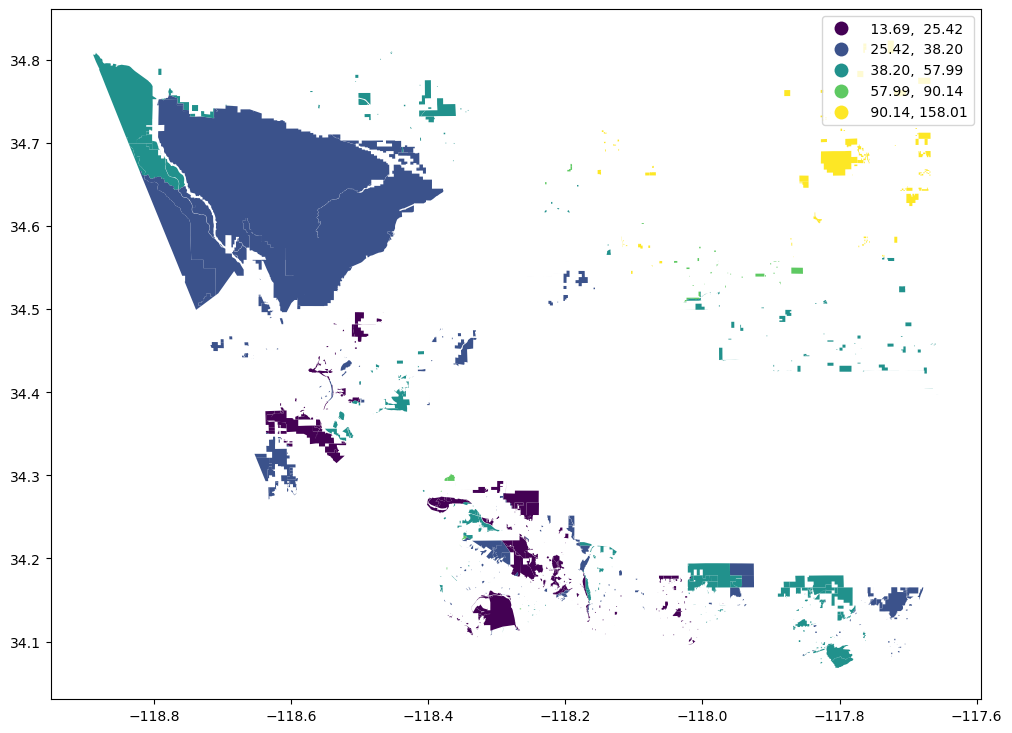

In [274]:
parks_locations.plot(figsize=(12,10),
                            column='Asthma',
                 legend=True, 
                 scheme='NaturalBreaks')

##### I don't think these are the two best variables to show together but here's a map with the parks in SD5. lets see park distribution in SD2 now

In [275]:
from shapely.geometry import Polygon
import geopandas as gpd

parks_locations2 = gpd.overlay(district2asthma, parks, how='intersection', keep_geom_type=False, make_valid=True)

In [276]:
parks_locations2.head()

,OBJECTID_1,CT20_x,LABEL_x,ShapeSTArea,ShapeSTLength,FIPS,Total Population,California County,ZIP_1,Approximate Location,...,CENTER_LON,ADDRESS,CITY,ZIP_2,HOURS,PHONES,IS_COUNTY,Shape__Area_2,Shape__Length_2,geometry
0,651,211500,2115.00,9.784612e+06,13106.019300,06037211500,4175,Los Angeles,90004,Los Angeles,...,-118.316199,4900 Beverly Blvd,Los Angeles,90004,None,(213) 847-3599,No,73048.368164,1115.384387,"POLYGON ((-118.31585 34.07522, -118.31651 34.0..."
1,663,212202,2122.02,2.222403e+06,6482.090647,06037212202,3424,Los Angeles,90005,Los Angeles,...,-118.289425,2909 Francis Ave,Los Angeles,90005,None,None,No,6750.990234,370.020208,"POLYGON ((-118.28952 34.05690, -118.28952 34.0..."
2,665,212204,2122.04,2.294673e+06,6149.261568,06037212204,3584,Los Angeles,90005,Los Angeles,...,-118.284035,625 Lafayette Park Pl,Los Angeles,90057,None,(213) 384-0562,No,395441.442383,3500.041635,"POLYGON ((-118.28409 34.06049, -118.28410 34.0..."
3,667,212304,2123.04,2.213843e+06,6305.425674,06037212304,1832,Los Angeles,90005,Los Angeles,...,-118.297361,3384 Wilshire Blvd,Los Angeles,90010,None,None,No,25016.842773,1319.240852,"POLYGON ((-118.29618 34.06159, -118.29671 34.0..."
4,677,212702,2127.02,9.478754e+06,13476.037993,06037212702,3632,Los Angeles,90005,Los Angeles,...,-118.325115,890 Lucerne Ave,Los Angeles,90005,None,(213) 485-5054,No,90640.950195,1515.763511,"POLYGON ((-118.32450 34.05734, -118.32527 34.0..."


<Axes: >

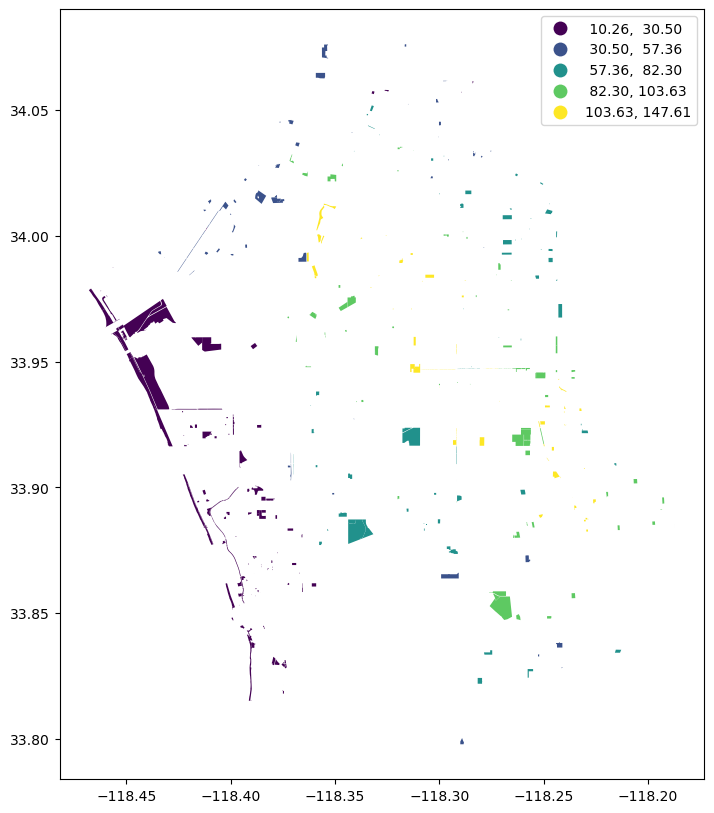

In [277]:
parks_locations2.plot(figsize=(12,10),
                            column='Asthma',
                 legend=True, 
                 scheme='NaturalBreaks')

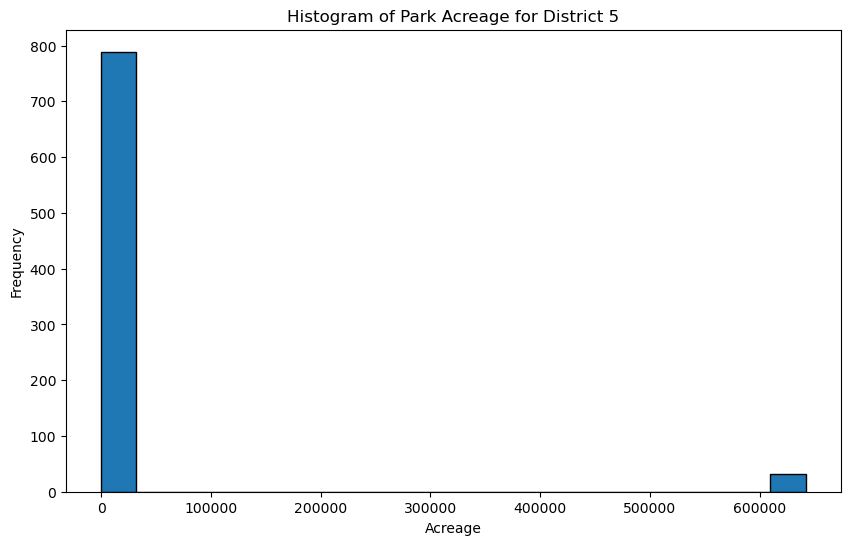

In [278]:
import matplotlib.pyplot as plt

parks_locations['GIS_ACRES'].plot(kind='hist', bins=20, edgecolor='black', figsize=(10, 6))

plt.title('Histogram of Park Acreage for District 5')
plt.xlabel('Acreage')
plt.ylabel('Frequency')
plt.show()


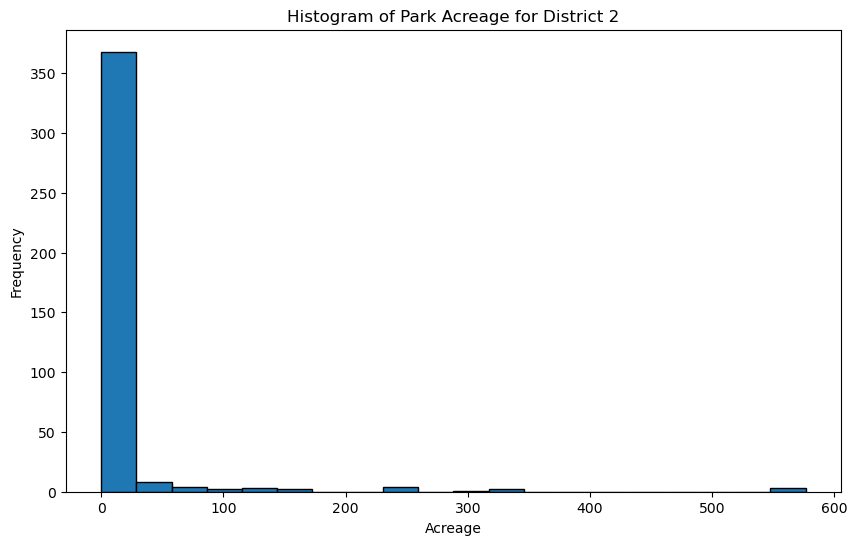

In [168]:
import matplotlib.pyplot as plt

parks_locations2 ['GIS_ACRES'].plot(kind='hist', bins=20, edgecolor='black', figsize=(10, 6))

plt.title('Histogram of Park Acreage for District 2')
plt.xlabel('Acreage')
plt.ylabel('Frequency')
plt.show()


In [279]:
districts_subset = district2[['DIST_SUP', 'Shape__Area']].dropna()
district_total_area2 = districts_subset.groupby('DIST_SUP')['Shape__Area'].sum().reset_index()
print(district_total_area2)

   DIST_SUP   Shape__Area
0         2  6.847577e+08


The histograms didn't really do the job for me. I calculated the raw number here by calculating the sum area for District 2 and dropping the missing values. 

This means that the total area of District 2 is approximately 684,757,700 square units 

Now i need to convert this to acres. 

In [297]:
def square_to_acres(value, unit):
    if unit.lower() == 'square feet':
        return value / 43560
    elif unit.lower() == 'square meters':
        return value / 4046.86
    elif unit.lower() == 'square kilometers':
        return value * 247.105
    elif unit.lower() == 'hectares':
        return value * 2.47105
    
square_value = 684757700
square_unit = 'square meters'  

acres_value = square_to_acres(square_value, square_unit)
print(f"{square_value:,} {square_unit} is equal to {acres_value:,.2f} acres.")


684,757,700 square meters is equal to 169,207.16 acres.


In [179]:
districts_subset5 = district5[['DIST_SUP', 'Shape__Area']].dropna()
district_total_area5 = districts_subset5.groupby('DIST_SUP')['Shape__Area'].sum().reset_index()
print(district_total_area5)

   DIST_SUP   Shape__Area
0         5  1.065095e+10


This means that the total area of District 5 is approximately 10,650,950,000 square units

In [298]:
def square_to_acres(value, unit):
    if unit.lower() == 'square feet':
        return value / 43560
    elif unit.lower() == 'square meters':
        return value / 4046.86
    elif unit.lower() == 'square kilometers':
        return value * 247.105
    elif unit.lower() == 'hectares':
        return value * 2.47105
    
square_value = 10650950000
square_unit = 'square meters'  

acres_value = square_to_acres(square_value, square_unit)
print(f"{square_value:,} {square_unit} is equal to {acres_value:,.2f} acres.")


10,650,950,000 square meters is equal to 2,631,904.74 acres.


In [299]:
larger_value = 2631904.74
smaller_value = 169207.16

difference = larger_value - smaller_value

print("Difference:", difference, "acres")

Difference: 2462697.58 acres


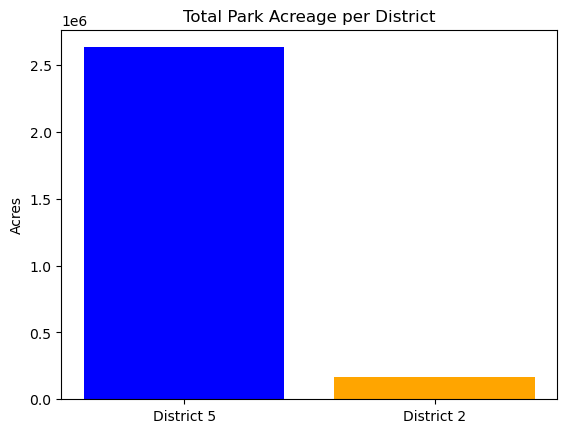

In [301]:
values = [2631904.74, 169207.16]
labels = ['District 5', 'District 2']

plt.bar(labels, values, color=['blue', 'orange'])
plt.ylabel('Acres')
plt.title('Total Park Acreage per District')
plt.show()


created a bar chart to compare the difference in park acreage. just needed 2 values on the x axis 

In [302]:
import folium

In [306]:
m = folium.Map(location=[34.051850, -118.243322], tiles=None)

folium.raster_layers.TileLayer(
    location=[34.051850, -118.243322],
    tiles='https://api.mapbox.com/styles/v1/cgiamarino/ckh3zcblc09pp19n0adewnboh/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    attr='Mapbox',
    API_key='pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    name='Monochrome',
    zoom_start=9  
).add_to(m)

folium.Choropleth(
   geo_data= district5asthma, 
    data= district5asthma,         
                  key_on='feature.properties.FIPS', 
                  columns=['FIPS', 'Asthma'], 
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2,
                  legend_name='Asthma Prevalence').add_to(m) 


In [307]:
m.save('sd5_asthma.html')

In [309]:
h = folium.Map(location=[34.051850, -118.243322], tiles=None)

folium.raster_layers.TileLayer(
    location=[34.051850, -118.243322],
    tiles='https://api.mapbox.com/styles/v1/cgiamarino/ckh3zcblc09pp19n0adewnboh/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    attr='Mapbox',
    API_key='pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    name='Monochrome',
    zoom_start=9  
).add_to(m)

folium.Choropleth(
   geo_data= district2asthma, 
    data= district2asthma,         
                  key_on='feature.properties.FIPS', 
                  columns=['FIPS', 'Asthma'], 
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2,
                  legend_name='Asthma Prevalence').add_to(h) 


In [310]:
h.save('sd2_asthma.html')

In [311]:
b = folium.Map(location=[34.051850, -118.243322], tiles=None)

folium.raster_layers.TileLayer(
    location=[34.051850, -118.243322],
    tiles='https://api.mapbox.com/styles/v1/cgiamarino/ckh3zcblc09pp19n0adewnboh/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    attr='Mapbox',
    API_key='pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    name='Monochrome',
    zoom_start=9  
).add_to(m)

folium.Choropleth(
   geo_data= parks_locations, 
    data= parks_locations,         
                  key_on='feature.properties.FIPS', 
                  columns=['FIPS', 'Asthma'], 
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2,
                  legend_name='Asthma/ Parks').add_to(b) 


In [313]:
b.save('sd5_parks_asthma.html')

In [314]:
j = folium.Map(location=[34.051850, -118.243322], tiles=None)

folium.raster_layers.TileLayer(
    location=[34.051850, -118.243322],
    tiles='https://api.mapbox.com/styles/v1/cgiamarino/ckh3zcblc09pp19n0adewnboh/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    attr='Mapbox',
    API_key='pk.eyJ1IjoiY2dpYW1hcmlubyIsImEiOiJjanAyd2hwNWUwYnJ3M3dzMHF4MnJkZ29uIn0.7tLnplw65tLmywvvIPGSKA',
    name='Monochrome',
    zoom_start=9  
).add_to(m)

folium.Choropleth(
   geo_data= parks_locations2, 
    data= parks_locations2,         
                  key_on='feature.properties.FIPS', 
                  columns=['FIPS', 'Asthma'], 
                  fill_color='BuPu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.2,
                  legend_name='Asthma/ Parks').add_to(j) 


In [315]:
j.save('sd2_parks_asthma.html')